In [ ]:
!unzip "/content/gdrive/MyDrive/Image Separation/all.zip" -d "/content/gdrive/MyDrive/Image Separation/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/Image Separation/all/11431.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/__MACOSX/all/._11431.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/all/4619.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/__MACOSX/all/._4619.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/all/2283.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/__MACOSX/all/._2283.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/all/1952.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/__MACOSX/all/._1952.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/all/6783.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/__MACOSX/all/._6783.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/all/578.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/__MACOSX/all/._578.jpg  
  inflating: /content/gdrive/MyDrive/Image Separation/a

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
import numpy as np
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def process_in_batches(image_paths, batch_size=100):
    embeddings = []
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i+batch_size]
        batch_images = []
        for p in batch_paths:
            img = image.load_img(os.path.join("/content/gdrive/MyDrive/Image Separation/all", p), target_size=(136, 102))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            batch_images.append(img_array)


        batch_images = np.vstack(batch_images)
        batch_embeddings = model.predict(batch_images)
        embeddings.append(batch_embeddings)
        print(f"Processed {i+batch_size} images")
    return np.vstack(embeddings)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
image_paths = [img_name for img_name in os.listdir("all")]
len(image_paths)

15000

In [ ]:
embeddings = process_in_batches(image_paths, 200)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 698ms/step
Processed 200 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processed 400 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processed 600 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed 800 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed 1000 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed 1200 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed 1400 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processed 1600 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processed 1800 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed 2000 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed 2200 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processed 2400 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processed 2600 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processed 2800 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processed 3000 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processed 3200 images
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Proc

In [ ]:
len(os.listdir("/content/gdrive/MyDrive/Image Separation/all"))

15000

In [ ]:
embeddings_path = '/content/embeddings.npy'

# Save the embeddings as a .npy file
np.save(embeddings_path, embeddings)

In [2]:
import numpy as np
# Load the embeddings from the .npy file
embeddings = np.load("embeddings.npy")

In [29]:
from sklearn.cluster import KMeans

n_clusters = 3  # Assuming you expect 3 categories: shoes, sandals, slippers
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)


In [4]:
len(embeddings)

15000

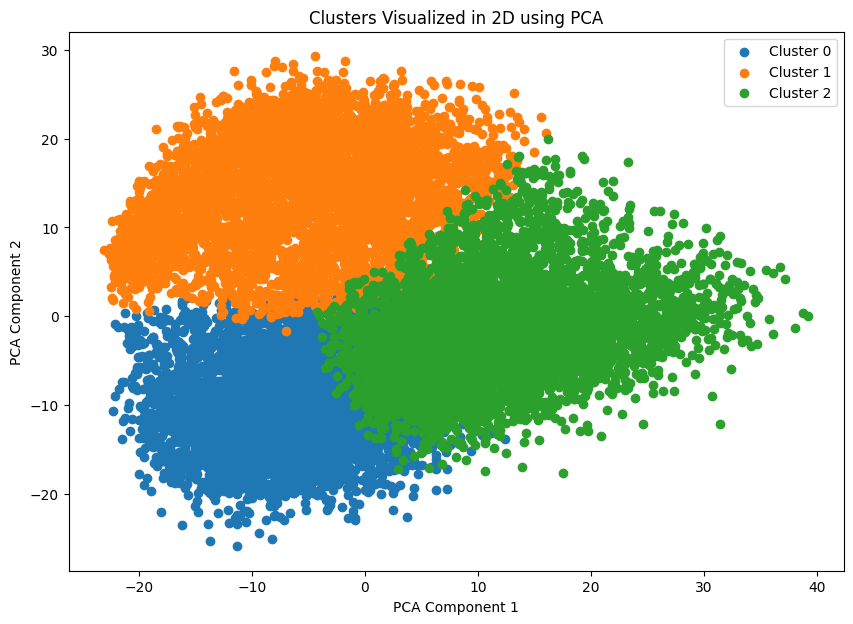

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the 2D PCA result
plt.figure(figsize=(10, 7))
for i in range(n_clusters):
    plt.scatter(reduced_embeddings[cluster_labels == i, 0], reduced_embeddings[cluster_labels == i, 1], label=f'Cluster {i}')
plt.title('Clusters Visualized in 2D using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [32]:
import shutil 
import os

# Paths for the destination folders
folder_paths = ['output/folder1',
                'output/folder2',
                'output/folder3']

# Create the destination folders if they don't exist
for folder_path in folder_paths:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Copy images to respective folders based on their cluster label
for label, img_path in zip(cluster_labels, image_paths):
    shutil.copy(os.path.join("all/", img_path), folder_paths[label])


In [26]:
shutil.copytree("/content/second/", "/content/gdrive/MyDrive/Image Separation/second/")

'/content/gdrive/MyDrive/Image Separation/second_copy/'

In [21]:
print(len(os.listdir(folder_paths[4])))

3332


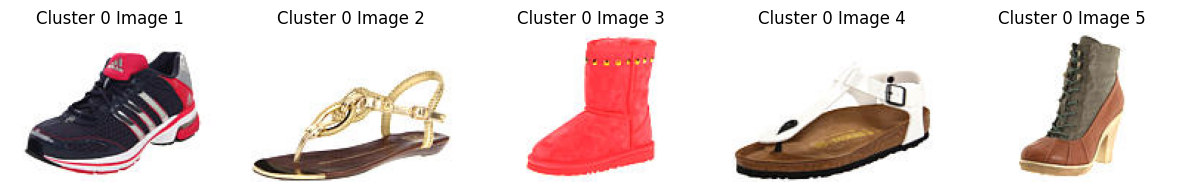

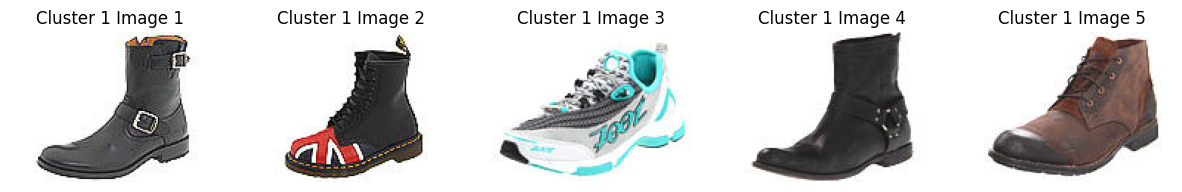

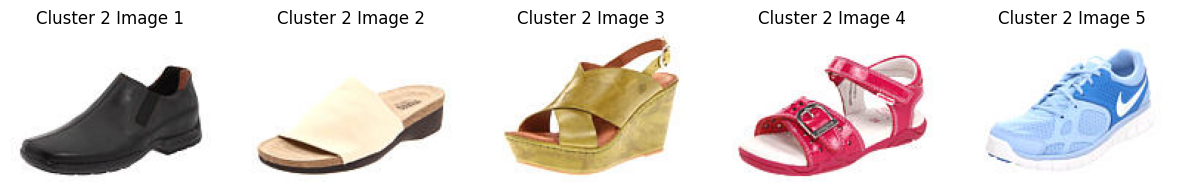

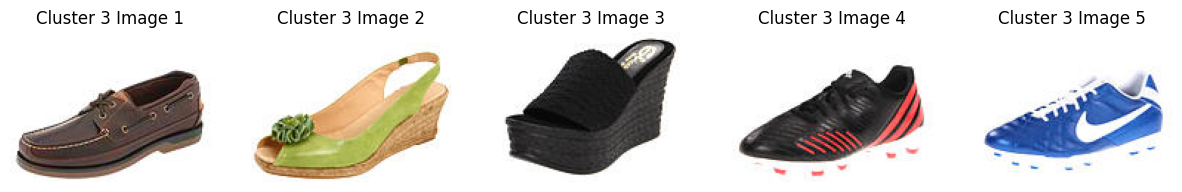

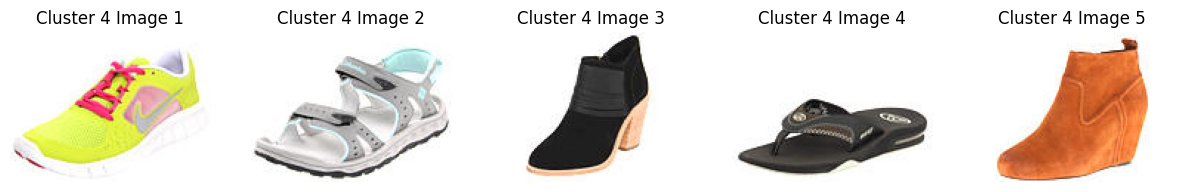

In [28]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def display_cluster_images(cluster_labels, image_paths, cluster_num, n_images=5):
    # Get the indices of images that belong to the specified cluster
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_num]

    # Randomly select a few images from the cluster
    selected_indices = random.sample(cluster_indices, min(n_images, len(cluster_indices)))

    # Set up the plot
    plt.figure(figsize=(15, 5))

    # Loop through the selected images and display them
    for i, idx in enumerate(selected_indices):
        img = Image.open(os.path.join("all/", image_paths[idx]))
        plt.subplot(1, n_images, i + 1)
        plt.imshow(img)
        plt.title(f'Cluster {cluster_num} Image {i + 1}')
        plt.axis('off')

    # Display the plot
    plt.show()
for i in range(5):
  # Display 5 sample images from cluster 0
  display_cluster_images(cluster_labels, image_paths, cluster_num=i, n_images=5)


In [15]:
%pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


In [16]:
import faiss

d = embeddings.shape[1]  # Dimension of the embeddings

# Create a GPU index using L2 (Euclidean) distance
index = faiss.IndexFlatL2(d)

# # Transfer index to GPU
# res = faiss.StandardGpuResources()
# gpu_index = faiss.index_cpu_to_gpu(res, 0, index)

# # Add embeddings to the index
# gpu_index.add(embeddings)

# Add embeddings to the index
index.add(embeddings)


In [26]:
n_clusters = 5  # Number of clusters for shoes, sandals, slippers
kmeans = faiss.Kmeans(d, n_clusters, niter=20, verbose=True)
kmeans.train(embeddings)

# Get the cluster assignments
cluster_labels = kmeans.index.search(embeddings, 1)[1].flatten()

In [ ]:
len(os.listdir(folder_paths[0]))

4056

In [ ]:
5435+5509+4056

15000